In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline


In [3]:
def dft(image):   


    F = np.zeros(image.shape,dtype = 'complex_')
    M = image.shape[0]
    N = image.shape[1]


    for k in range(M):
      for l in range(N):
          F[k][l] = 0
          for m in range(M):
              for n in range(N):
                  bracket = k*m*(1/M)+l*n*(1/N)
                  F[k][l]+=image[m][n]*np.exp(-2j*np.pi*bracket)
    return F


In [4]:
def idft(image):


    F = np.zeros(image.shape,dtype = 'complex_')
    M = image.shape[0]
    N = image.shape[1]
    for k in range(M):
        for l in range(N):
            F[k][l] = 0
            for m in range(M):
                for n in range(N):
                    bracket = k*m*(1/M)+l*n*(1/N)
                    F[k][l]+=image[m][n]*np.exp(2j*np.pi*bracket)
    F/=(M*N)
    return F

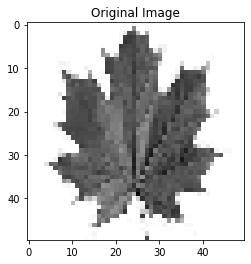

In [5]:
image = cv2.imread("img10.jpg",0)
image = cv2.resize(image, (50, 50),
interpolation = cv2.INTER_NEAREST)
plt.imshow(image,cmap='gray')
plt.title("Original Image")
plt.show()

Text(0.5, 1.0, 'DFT Transformed Image')

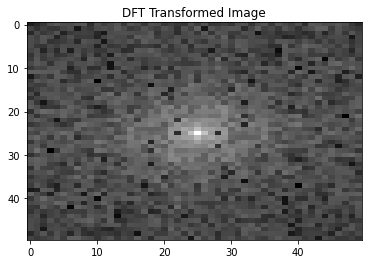

In [6]:
ft = dft(image)
fshift = np.fft.fftshift(ft)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(np.array(magnitude_spectrum),cmap='gray' ,aspect ="auto")
plt.title("DFT Transformed Image")

In [8]:
inverse = idft(ft)

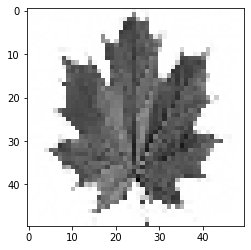

In [9]:
reverseImage = np.floor(np.abs(inverse))
plt.imshow(reverseImage,cmap='gray')
